In [1]:
# Cell for reading in our data/csv's and setting up our matricies (Because it takes too much time+memory)
import random
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as confusionMatrix
from sklearn.metrics import recall_score as recall
from sklearn.metrics import classification_report as classificationReport

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Added this line so matplot can actually display the images in Jupyter
%matplotlib inline  

# Path to our csv
TRAIN_DIR = "C:/Users/Mike/Jupyter/CSVs/digit-recog/train.csv"

# Amount of data entries
MAX_DATA_LIMIT = 21000

# Read in the data set as a matrix
trainingDataSet = pd.read_csv(TRAIN_DIR).values;

# Create an array holding your training data, excluding index 0 (Your labels)
rawTrainingData = trainingDataSet[0:MAX_DATA_LIMIT,1:]

# Create an array holding your training labels exclusively
rawTrainingLabels = trainingDataSet[0:MAX_DATA_LIMIT,0]

# Split our data
TrainingData, TestData, TrainingLabels, TestLabels = train_test_split(rawTrainingData,rawTrainingLabels, test_size=0.1, random_state=0)



In [ ]:
# We can convert the matrix back into a dataframe
pd.DataFrame(trainingDataSet).head(2)

In [2]:
# Cell for training our model

# Decision Tree Classifier
DTC = DecisionTreeClassifier()

# Builds a decision tree classifier using the training data and its labels
DTC.fit(TrainingData,TrainingLabels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [3]:
# Plot Confusion Matrix Function

def Plot_Confusion_Matrix(matrix,classes,title,cmap):
    
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    plt.colorbar()
    
    numberOfTickMarks = np.arange(len(classes))
    
    plt.xticks(numberOfTickMarks,classes,rotation=45)
    plt.yticks(numberOfTickMarks,classes)
    
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    
    plt.tight_layout()


Recall Score / Model Accuracy : 0.840952380952381

Classification Report :

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       201
           1       0.91      0.95      0.93       246
           2       0.82      0.80      0.81       199
           3       0.75      0.75      0.75       212
           4       0.79      0.82      0.81       194
           5       0.80      0.79      0.79       181
           6       0.90      0.89      0.90       219
           7       0.87      0.93      0.90       238
           8       0.81      0.73      0.77       214
           9       0.80      0.80      0.80       196

   micro avg       0.84      0.84      0.84      2100
   macro avg       0.84      0.84      0.84      2100
weighted avg       0.84      0.84      0.84      2100



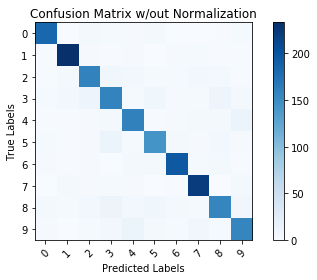

In [4]:
# Cell for testing our model

# Create an object that'll run the model with a given index and return the label it predicted
prediction = DTC.predict(TestData)

# Create Confusion Matrix
# Passing in our true labels and what our model predicted
cm = confusionMatrix(TestLabels,prediction)

# Create an array representing each class
classNames = ['0','1','2','3','4','5','6','7','8','9']

# Compute the recall ratio ( truePos/(truePos+falseNeg) )
print('Recall Score / Model Accuracy :',recall(TestLabels,prediction,average='micro'))

print('\nClassification Report :\n')

# Output a classification report
print(classificationReport(TestLabels,prediction,target_names=classNames))

# Plot+Display Confusion Matrix
Plot_Confusion_Matrix(cm,classNames,'Confusion Matrix w/out Normalization',plt.cm.Blues)



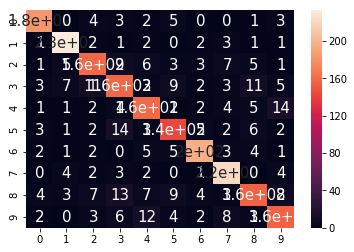

In [5]:
#Confusion matrix heat map using Seaborn
sb.heatmap(cm, annot = True, annot_kws={"size": 15})

Predicted Label : 6
Actual Label : 6
Index : 714


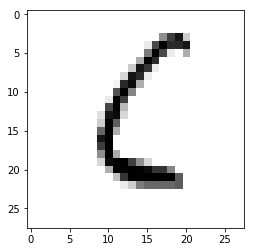

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 113
  193 234  51   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  21 183 253
  212 213 232   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 132 253 183
   20   0  82   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 253 212   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  51 233 203  20   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  41 233 212  2

In [6]:
# Cell for displaying an image in our data set and predicting what the image is

# Select a random image from our test data set
SELECTED_IMAGE = random.randrange(0,prediction.size)

# Select the image we want to show
image = TestData[SELECTED_IMAGE]

# Use reshape(1,-1) to pass in a single element at the correct size
imageModelInput = image.reshape(1,-1)

# NOTE: Need to pass in a 2D array for it to work. A single element from a 2D array won't work. (It'll pass in a 1D array)
predict = DTC.predict(imageModelInput)

# Output what the model things the image is.
print("Predicted Label :",predict[0])

# Convert's the array element into a 28x28 image
image.shape=(28,28)

print('Actual Label :',TestLabels[SELECTED_IMAGE])
print('Index :',SELECTED_IMAGE)

# Show the image in gray scale using pyplot
# NOTE: 'binary' is like 'gray' cmap but in reverse
plt.imshow(image,cmap='binary')
plt.show()

print(image)


In [9]:
# Other stuff

print("\nTree params = \n",DTC.get_params())
print("\nScore = ",DTC.score(TestData,TestLabels))


Tree params = 
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Score =  0.840952380952381


In [8]:
# Allows us to serialize+save our model

import pickle

saveFileDir = "C:/Users/Mike/Jupyter/PickleObjects/"

filename = 'DigitRecogModel'

pickle.dump(DTC,open(saveFileDir+filename,'wb'))

In [ ]:
# Load the model and score it to make sure it works

loadedDigitRecogModel = pickle.load(open(saveFileDir+filename,'rb'))
loadedDigitRecogModel.score(rawTrainingData,rawTrainingLabels)

In [ ]:
# Save training data and labels
# Don't need to do this unless you want to move your data out for testing purposes

RTDName = 'TrainingData'
RTLName = 'TrainingLabels'

pickle.dump(rawTrainingData,open(saveFileDir+RTDName,'wb'))
pickle.dump(rawTrainingLabels,open(saveFileDir+RTLName,'wb'))

In [11]:

loaded_model = pickle.load(open("C:/Users/Mike/Jupyter/PickleObjects/DigitRecogModel", 'rb'))
result = loaded_model.score(rawTrainingData, rawTrainingLabels)
print(result)

0.9840952380952381
